In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data=pd.read_excel("trial_data4.xlsx")

In [90]:
data.head()

,fid,hex_id,stats_ndvi_mean,stats_ndbi__mean,stats_albedo__mean,stats_gaia__mean,stats_ntl__mean,stats_pop__sum,stats_s1_vh__mean,stats_s1_vv__mean,h8_heights_mean
0,1,883da119c3fffff,0.170212,-0.055115,0.270056,5.526425,18.005763,2943.907908,5.037355,-7.301261,NaN
1,2,883da152c7fffff,0.313376,-0.163804,0.282464,0.042918,2.321780,213.499294,6.868471,-9.923065,NaN
2,3,883da15247fffff,0.310833,-0.166947,0.276044,0.060543,2.244044,231.787892,7.228392,0.000617,NaN
3,5,883da1c807fffff,0.329162,-0.148548,0.284163,0.000000,1.372867,124.559775,6.389990,-9.538286,NaN
4,6,883da1c087fffff,0.291662,-0.141830,0.281350,1.886481,1.710714,449.240675,6.499904,-9.415530,NaN


In [95]:
""" Removing two attributes fid and hex_id """
data=data.iloc[:,2:]
""" Removing two attributes fid and hex_id """

' Removing two attributes fid and hex_id '

In [94]:
data.info()
"""Here we find that we have total 1692 data points but in target variable we have only 42 data points in
h8_height_mean so we go with only that 42 rows """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stats_albedo__mean  1692 non-null   float64
 1   stats_gaia__mean    1692 non-null   float64
 2   stats_ntl__mean     1692 non-null   float64
 3   stats_pop__sum      1692 non-null   float64
 4   stats_s1_vh__mean   1692 non-null   float64
 5   stats_s1_vv__mean   1692 non-null   float64
 6   h8_heights_mean     42 non-null     float64
dtypes: float64(7)
memory usage: 92.7 KB


'Here we find that we have total 1692 data points but in target variable we have only 42 data points in\nh8_height_mean so we go with only that 42 rows '

In [45]:
"""we go with only that 42 rows """
df_test=data[data["h8_heights_mean"].isnull()==False]

In [101]:
print("shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())


shape of_working data:-  (42, 9) 

No of null values 
 stats_ndvi_mean       0
stats_ndbi__mean      0
stats_albedo__mean    0
stats_gaia__mean      0
stats_ntl__mean       0
stats_pop__sum        0
stats_s1_vh__mean     0
stats_s1_vv__mean     0
h8_heights_mean       0
dtype: int64


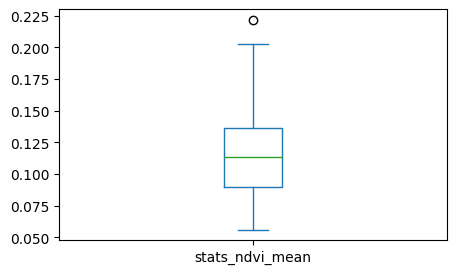

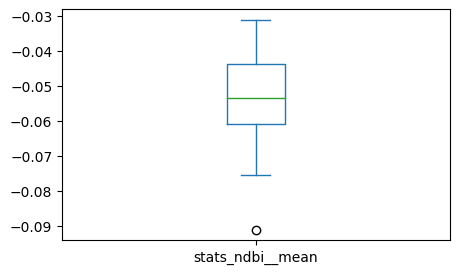

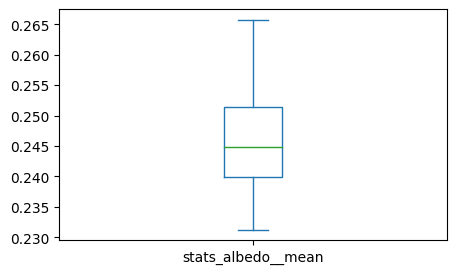

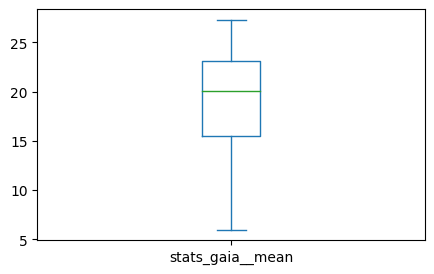

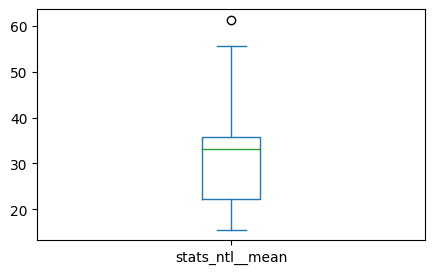

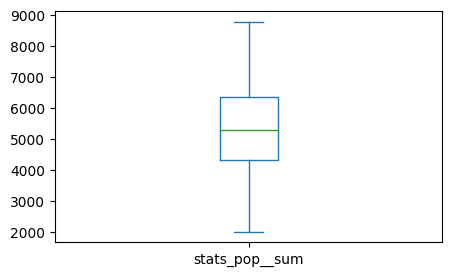

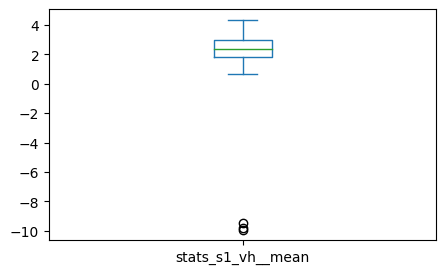

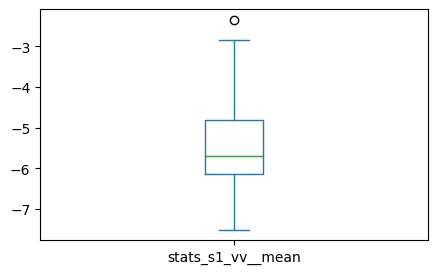

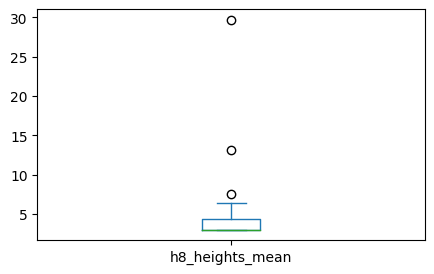

In [47]:
for i in df_test.columns:
    plt.figure(figsize=(5,3))
    df_test[i].plot(kind="box")
    #there is some outlier in  s1_vh_mean and h8_heights_mean

<AxesSubplot: >

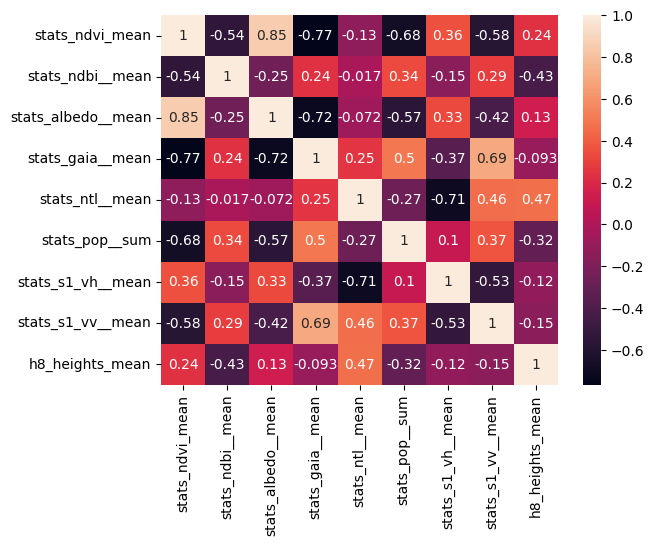

In [48]:
sns.heatmap(df_test.corr(),annot=True)
# There is highest positive correlation btw albedo_mean & ndvi_mean 
# There is highest negative correlation btw gaib_mean and h8_heights_mean

' there might be some relation btw gaia_mea,ntl_mean(higly),pop_sum,s1_vh_mean, s1_vv_mean'

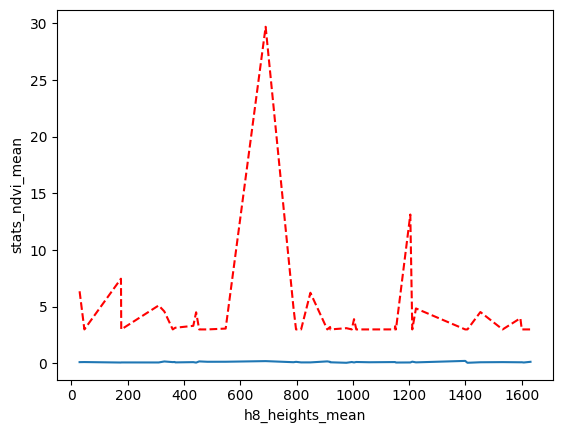

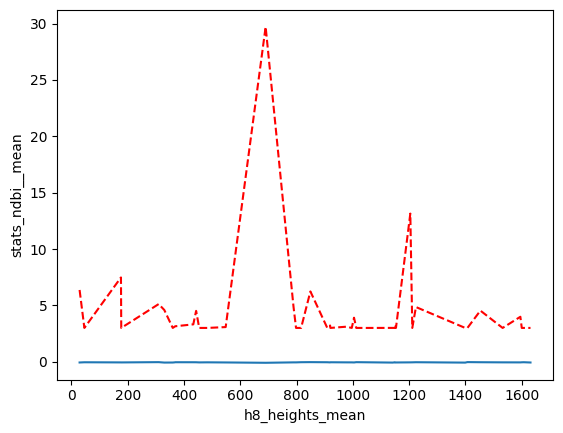

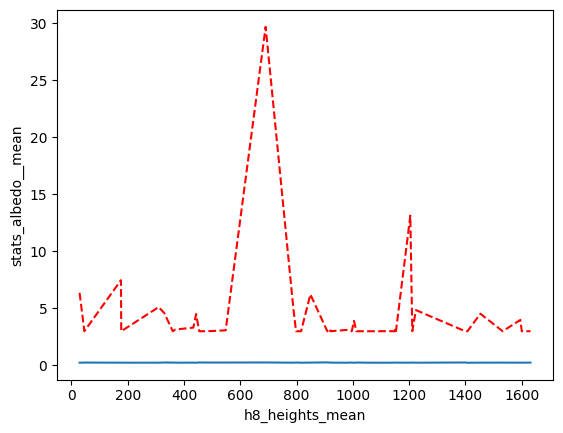

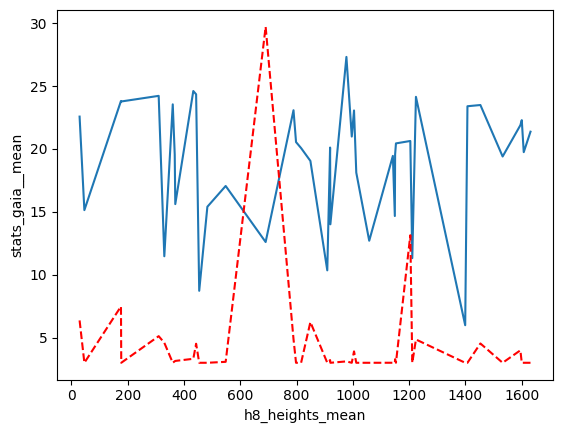

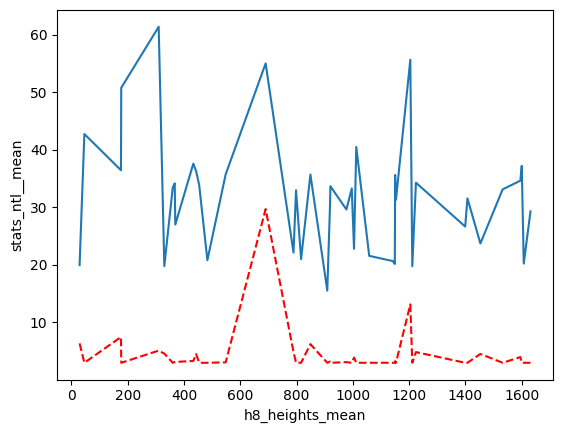

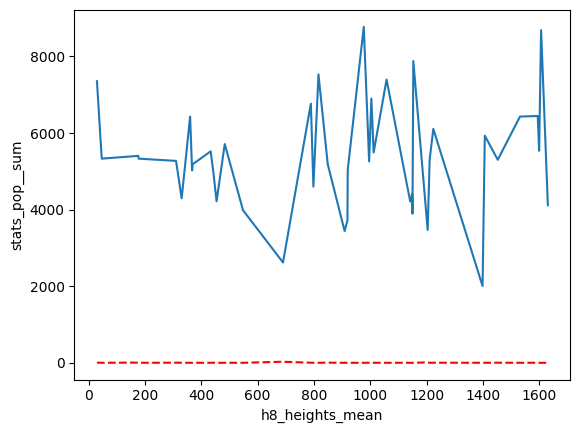

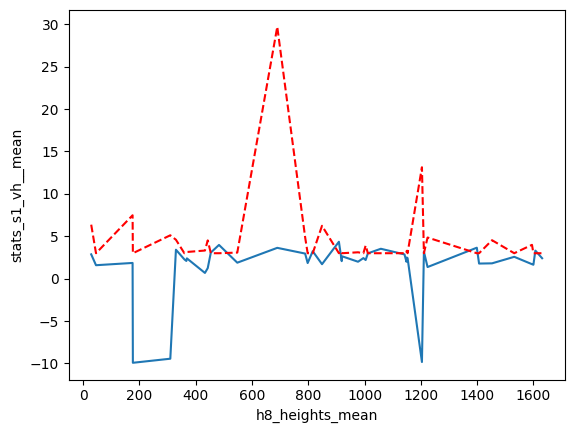

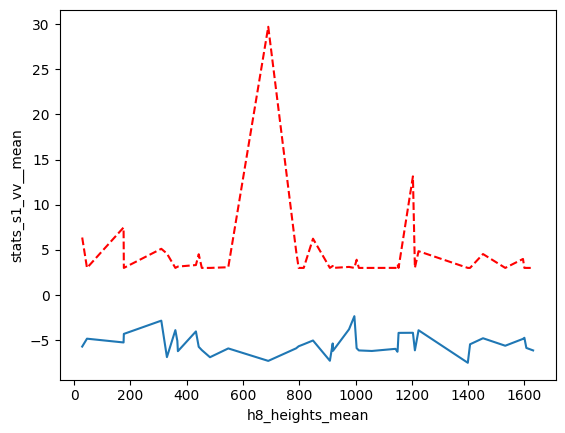

In [49]:
for i in df_test.columns[:-1]:
    plt.figure()
    plt.plot(df_test[i])
    plt.plot(df_test["h8_heights_mean"],"r--")
    plt.xlabel("h8_heights_mean")
    plt.ylabel(i)
""" there might be some relation btw gaia_mea,ntl_mean(higly),pop_sum,s1_vh_mean, s1_vv_mean"""

# Linear Regression

In [50]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33, 8)
(33,)
(9, 8)
(9,)


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

In [55]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  2.231450280904275
mean Absolute error_of_test:  3.3367902702657513
mean squared error_of_train:  8.435381582601591
mean squared error_of_test:  15.422359230331956
root mean Absolute error_of_train:  2.9043728380842553
root mean Absolute error_of_test:  3.927131170502452
r2_on_train:  0.5964383116868283
r2_on_test:   -0.4124120461487004


# RandomForest

In [56]:
x=df_test.iloc[:,:-1]
y=df_test.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33, 8)
(33,)
(9, 8)
(9,)


In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor
model_r=RandomForestRegressor(n_estimators=200,max_depth=1,random_state=42)

In [63]:
model_r.fit(x_train,y_train)

RandomForestRegressor(max_depth=1, n_estimators=200, random_state=42)

In [64]:
y_predict_train=model_r.predict(x_train)
y_predict_test=model_r.predict(x_test)

In [65]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.2881038212707099
mean Absolute error_of_test:  2.5384447855803236
mean squared error_of_train:  5.130071643928714
mean squared error_of_test:  12.323547090413484
root mean Absolute error_of_train:  2.264966146309634
root mean Absolute error_of_test:  3.5104910041778323
r2_on_train:  0.754569446145566
r2_on_test:   -0.12861632269255097


In [77]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
# when there is no max_depth it takes none so that the model go to its maximum extent 
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
# Create the random grid
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
random_grid
rf=RandomForestRegressor(random_state=42)
# here cv is cross validation and n_jobs=-1 tell to run all trees simulteniously
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                             scoring='neg_mean_absolute_error',cv=3,verbose=2,
                             random_state=42,n_jobs=-1,return_train_score=True)

rf2=rf_random.fit(x_train,y_train);
# by runninng below code we get  the parameter for best model
print("best parameter",rf2.best_params_)
y_pred=rf2.predict(x_test)
# Now accuracy improve
#accuracy_score(y_pred,y_test)
print("r2_on_train: ", (y_pred,y_test))
rf2.cv_results_
#importance=rf2.feature_importances_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


best parameter {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
r2_on_train:  (array([17.412717  ,  4.73371611,  3.01925541,  4.73371611,  3.02746375,
        3.096614  ,  3.7948205 ,  4.73371611, 17.412717  ]), 177      3.000000
176      7.477440
996      3.000000
1600     3.000000
816      3.000000
1150     3.284706
909      3.000000
1407     3.000000
1204    13.139955
Name: h8_heights_mean, dtype: float64)


{'mean_fit_time': array([0.84055082, 4.24257994, 1.79973022, 3.16184306, 3.41561906,
        1.14468535, 1.4448959 , 0.85965482, 1.47242586, 2.48909664,
        0.78706145, 1.01090638, 2.48433622, 2.02533054, 1.03738578,
        2.38737257, 0.90871557, 1.84004219, 2.54123553, 1.15955869,
        2.27652041, 2.05474416, 2.49916005, 3.45272557, 1.74507324,
        0.53656236, 1.95333767, 1.81891855, 2.75284187, 2.1291976 ,
        1.65011255, 1.01554863, 1.00623862, 1.49919915, 3.25297276,
        0.99269724, 2.18153111, 1.53711073, 1.52441963, 1.77191472,
        0.40161029, 1.07674909, 1.46844029, 0.70718217, 0.27619704,
        1.83627232, 3.95859687, 0.55396493, 1.54382388, 0.77574094,
        2.68220957, 2.92312527, 1.46138191, 1.53353723, 1.92589792,
        0.82127086, 3.45031643, 3.68232894, 2.93613982, 2.68032026,
        0.39096053, 0.8085866 , 1.5295523 , 1.8848153 , 3.15883668,
        3.38825504, 2.61454026, 2.90373166, 1.36491259, 3.11551619,
        1.98541896, 1.13103843,

In [81]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=1200,max_depth=10,min_samples_leaf=2,random_state=42)

In [82]:
model_r_b.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=1200,
                      random_state=42)

In [85]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)

In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))

mean Absolute error_of_train:  1.241963985268396
mean Absolute error_of_test:  2.3613298088559143
mean squared error_of_train:  10.13773833282041
mean squared error_of_test:  8.898746895619247
root mean Absolute error_of_train:  3.1839815220601406
root mean Absolute error_of_test:  2.983076749870718
r2_on_train:  0.5149949344664526
r2_on_test:   0.18503407142264816
